# 유튜브로 노래 다운로드 및 mp3 파일로 변환

In [2]:
import selenium
import time
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from itertools import repeat
from selenium import webdriver   # selenium 프레임 워크에서 webdriver 가져오기
global tmp
import clipboard
    
def extrct_song_link_from_Youtube(song_name):
    url = 'https://www.youtube.com/results?search_query=' + song_name
    driver = webdriver.Chrome('C:/real_anaconda3/chromedriver.exe')  # 크롬 드라이버로 크롬 켜기
    driver.get(url) 
    
    driver.find_element_by_xpath('/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a/yt-formatted-string').click()
    time.sleep(2)
    driver.find_element_by_link_text('공유').click()
    time.sleep(1)
    driver.find_element_by_xpath('/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-unified-share-panel-renderer/div[2]/yt-third-party-network-section-renderer/div[2]/yt-copy-link-renderer/div/yt-button-renderer/a/tp-yt-paper-button/yt-formatted-string').click()
    
    tmp = clipboard.paste()
    return tmp

from pytube import YouTube

song_name = input("노래 제목을 입력해주세요: ")
song_link = extrct_song_link_from_Youtube(song_name)

YouTube(song_link).streams.first().download(filename = song_name + ".3gpp")

#폴더 내 방금 다운받은 동영상 찾아내기
import os
import moviepy.editor as mp

path = os.getcwd()

file_list = os.listdir(path)

song_list = []
for i in range(0, len(file_list)):
    movie_name = path + '/' + song_name + ".3gpp"
    song_target = movie_name[41:]
    song_full_info = song_target + ".mp3"
        
#폴더 내 방금 다운받은 노래 mp3 변환
clip = mp.VideoFileClip(song_target)
clip.audio.write_audiofile(song_target + ".mp3")

노래 제목을 입력해주세요: 오르트구름


OSError: MoviePy error: the file  could not be found!
Please check that you entered the correct path.

# 다운 받은 노래 mr 제거 및 wav 형태로 변환

In [2]:
import spleeter
import ffmpeg

import os
import subprocess

path = os.getcwd()

path_dir = path
file_list = os.listdir(path_dir)

filename_list = []
filename_f_list = []
for i in range(0, len(file_list)):
    filename = "C:/Users/dltkd/!Find_Melody/song_process/" + file_list[i]
    if filename[41:] == song_full_info:
        filename_list.append(filename)
    
for i in range(0, len(filename_list)):
    batcmd = 'spleeter separate -o C:/Users/dltkd/!Find_Melody/song_data -p spleeter:2stems-16kHz "%s"' % (filename_list[i])
    result = subprocess.check_output(batcmd, shell = True)
    print(result.decode('cp949'))
    
path_dir = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp"
file_list = os.listdir(path_dir)

old_name = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/vocals.wav"
new_name = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/" + song_name + ".wav"

os.rename(old_name, new_name)

INFO:spleeter:File C:\Users\dltkd\!Find_Melody\song_data\그녀가 웃잖아.3gpp/vocals.wav written succesfully
INFO:spleeter:File C:\Users\dltkd\!Find_Melody\song_data\그녀가 웃잖아.3gpp/accompaniment.wav written succesfully



# 다운로드 받은 노래 pitch값 추출, 추출한 값 csv로 변환 및 저장

In [1]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import shutil

file_n = "C:/Users/dltkd/!Find_Melody/song_data/" + song_name + ".3gpp/" + song_name + ".wav"

snd = parselmouth.Sound(file_n)
pitch = snd.to_pitch()

pitch_xs = (list(pitch.xs()))
pitch_values = pitch.selected_array['frequency']

pitch_xs_2 = []
for i in range(0, len(pitch_xs)):
    pitch_xs_temp = str(pitch_xs[i])
    pitch_xs_2.insert(len(pitch_xs_2), pitch_xs_temp)

pitch_values_NoNull = []
del_target = []

for i in range(0, len(pitch_values)):
    if pitch_values[i] != 0:
        pitch_values_NoNull.append(pitch_values[i])
    else:
        del_target.append(i)

for i in range(0, len(del_target)):
    pitch_xs_2.remove(str(pitch_xs[del_target[i]]))

pitch_xs_3 = []
for i in range(0, len(pitch_xs_2)):
    pitch_xs_3.append(eval(pitch_xs_2[i]))

pitch_values_for300 = []
pitch_xs_for300 = []
temp_values = 0
temp_xs = 0
cnt = 0
tot_cnt = 0
for i in range(0, len(pitch_values_NoNull)):
    temp_values = temp_values + pitch_values_NoNull[i]
    temp_xs = temp_xs + pitch_xs_3[i]
    cnt += 1
    if cnt == (int(len(pitch_values_NoNull)/300)):
        temp_values = temp_values/(int(len(pitch_values_NoNull)/300))
        temp_xs = temp_xs/(int(len(pitch_values_NoNull)/300))
        pitch_values_for300.append(temp_values)
        pitch_xs_for300.append(temp_xs)
        temp = 0
        cnt = 0
        tot_cnt += 1
        if tot_cnt == 300:
            break

df_temp = pd.DataFrame(
    {'period_of_song': pitch_xs_for300,
    'pitch_of_song': pitch_values_for300}
)

df_temp.to_csv(file_n + ".csv", mode='w', header=True)

old_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/" + song_name + ".wav.csv"
new_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".csv"
os.rename(old_name_2, new_name_2)

C:\real_anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\real_anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\real_anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'song_name' is not defined

# csv 형태로 변환한 노래의 pitch값을 기존의 데이터셋에 불러옴

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory = 'C:\\Users\dltkd\!Find_Melody\song_data\\'

mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(directory+filename)
        df = df.loc[:,["period_of_song","pitch_of_song"]]
        # While we are at it I just filtered the columns that we will be working on
        df.set_index("period_of_song",inplace=True)
        # ,set the date columns as index
        df.sort_index(inplace=True)
        # and lastly, ordered the data according to our date index
        mySeries.append(df)
        namesofMySeries.append(filename[:-4])

# 보유 음원 수 확인

In [5]:
print(len(mySeries))

283


In [6]:
# 전체 음원 형태 확인
#fig, axs = plt.subplots(int(len(mySeries)/4),4,figsize=(25,25))
#fig.suptitle('Series')
#for i in range(int(len(mySeries)/4)):
    #for j in range(4):
        #if i*4+j+1>len(mySeries): # pass the others that we can't fill
            #continue
        #axs[i, j].plot(mySeries[i*4+j].values)
        #axs[i, j].set_title(namesofMySeries[i*4+j])
#plt.show()

In [7]:
# 음원 길이 확인
#series_lengths = {len(series) for series in mySeries}
#print(series_lengths)

In [8]:
# MinMaxScaler() 전처리. 
# ->기존의 최저 0, 최고 600의 값을 가지고 있는 다양한 pitch값들을 그대로 군집화할경우 상당한 시간이 소요되기 때문
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [9]:
#MinMaxScaler() 전처리 작업 값 보기
#print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
#print(mySeries[0][:5])

In [10]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

In [11]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [12]:
# 1차 dba. 안해도 됨
# win_map = som.win_map(mySeries)
# plot_som_series_dba_center(som_x, som_y, win_map)

In [13]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
WINNER - ISLAND MV.3gpp.wav,Cluster 1
十豆彡 - 这就是爱吗【動態歌詞Lyrics Video】.3gpp.wav,Cluster 10
杨胖雨 - 这就是爱吗【動態歌詞Lyrics Video】.3gpp.wav,Cluster 10
YOASOBI「夜に駆ける」 Official Music Video.3gpp.mp3.wav,Cluster 11
【남자가부름】 밤을 달리다／YOASOBI (아카펠라cover).3gpp.mp3.wav,Cluster 11
...,...
[Official] TP RETRO (타디스 프로젝트) - 오늘도 그대만 (Feat 정동원) (Even Today Only You).3gpp.wav,Cluster 8
숀 - Way back home 랩 cover.3gpp.wav,Cluster 8
심규선 - 야래향 夜來香 COVER.3gpp.wav,Cluster 8


# 군집화
### 약 30초 소요

In [14]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

# 비슷한 멜로디의 노래 그래프 시각화

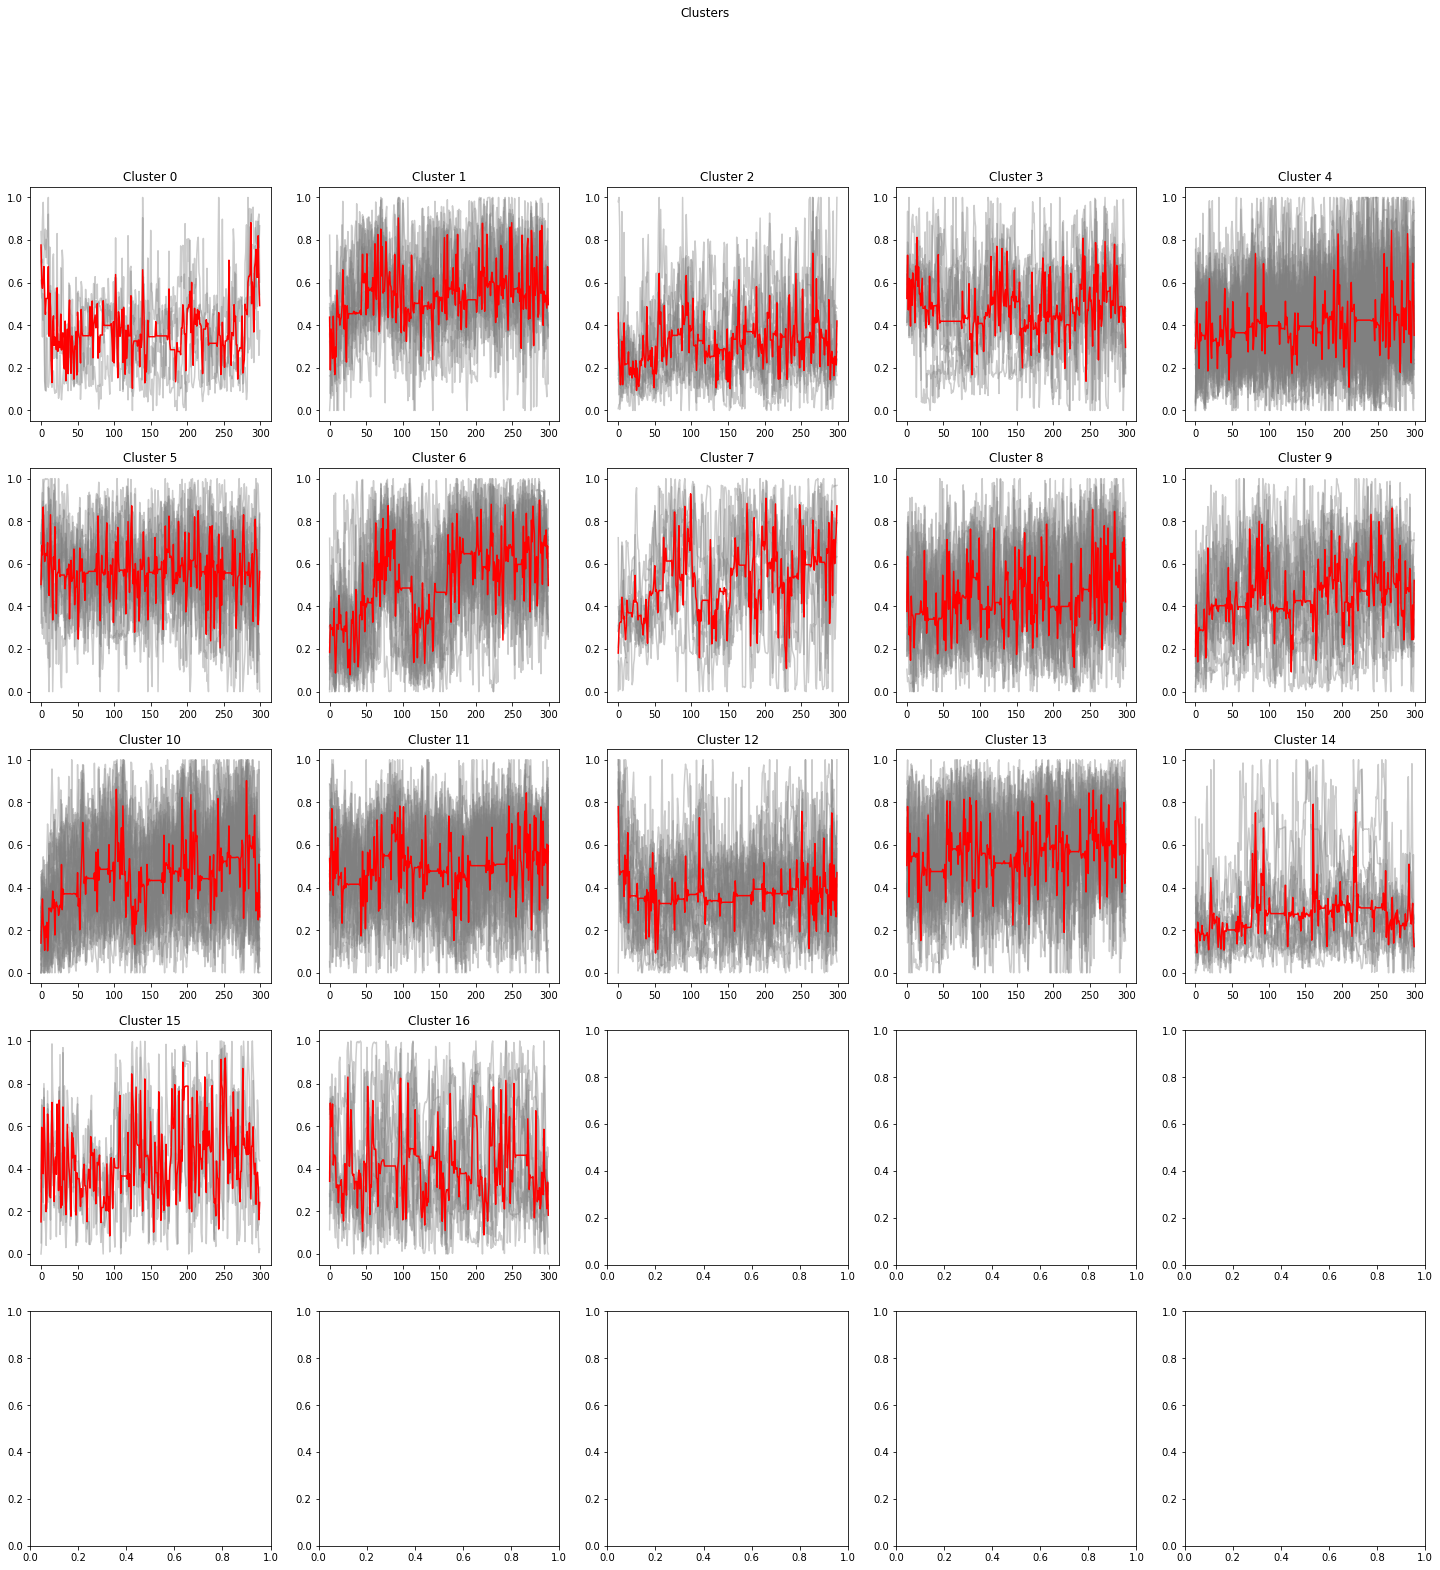

In [15]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [16]:
labels

array([ 4,  1, 12, 13,  4,  4,  8,  6,  4,  4,  4, 14, 10, 13, 11,  9, 12,
        9, 11, 13, 10, 12,  9, 13,  4, 10,  6, 10, 10, 10,  1,  9,  2,  4,
        4, 16,  8, 13, 12, 10, 10, 13,  2,  1,  4, 13,  4,  0,  8,  8, 14,
       11,  5,  3, 12, 11,  1,  8,  9,  4,  4, 11,  8,  8,  5, 13, 13,  8,
        1, 12, 12, 12, 11, 10,  3, 10,  4,  6, 10,  4,  5,  9, 10, 16, 13,
        0,  7,  2, 11,  2,  4,  8, 10, 11, 16, 12,  9,  4,  4, 11, 15, 13,
       11, 14, 13, 10,  9,  1,  9, 10,  4,  8,  6, 10, 14,  7,  2,  4,  6,
        9, 10,  4,  5,  6,  1,  8,  8,  3,  8,  6, 13,  8,  1, 10,  8,  7,
        3, 10,  6, 13, 15, 12,  6,  4, 10, 15,  4,  4,  6,  4, 11,  2,  4,
        4,  1,  7, 12,  6,  3,  8, 11,  5, 13,  6, 13,  5,  0, 13,  8, 11,
       11, 10,  3,  2,  5, 11, 11, 14,  5, 13, 10,  4, 11,  4, 10, 11, 11,
       13,  1,  4, 14, 10, 12, 10,  9, 10,  4, 12, 12, 11, 16,  4, 14,  5,
        1, 12, 11, 10, 12,  4,  4,  4,  6, 16,  6,  6,  7, 14, 16, 10, 11,
        4,  4, 16,  4,  9

In [17]:
song_cnt = (len(mySeries))
index_list = list(range(0, song_cnt, 1))

In [18]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
test_df = pd.DataFrame({"Series": namesofMySeries, "Cluster": fancy_names_for_labels}, index=index_list).sort_values(by="Cluster")

In [19]:
# 다운로드 받은 노래가 속한 cluster
for i in range(0, song_cnt):
    if test_df.loc[i][0] == song_name:
        print(test_df[test_df["Cluster"] == test_df.loc[i][1]])

                                                Series     Cluster
61                  WINNER - REALLY REALLY MV.3gpp.wav  Cluster 11
72              [cover] 밤새도록 너를 생각해 PARED.3gpp.mp3.wav  Cluster 11
102       [欲言又止]아련한 사랑노래 말하려다 멈췄어(가사 병음 한글자막).3gpp.wav  Cluster 11
275  프로미스나인 (fromis_9) WE GO Performance Video.3gpp...  Cluster 11
93   [PRODUCE 48] Memory Fabricators (기억 조작단) - 너에게...  Cluster 11
170                                            그녀가 웃잖아  Cluster 11
271   태연 ( TAEYEON) - 사계 (Four Seasons) COVER.3gpp.wav  Cluster 11
169  귀염귀염열매 능력자 펑티모가 부르는 《고백풍선  告白气球》 주걸륜의 스윗한 노래 C...  Cluster 11
220  슈프림팀Supreme Team   그땐 그땐 그땐 HD FULL SONG.3gpp.wav  Cluster 11
99      [有点甜]중국에서 최고로 달달한 사랑노래달콤해(가사 병음 한글자막).3gpp.wav  Cluster 11
250                     이지승X달지 - VVS 무대버전  커버.3gpp.wav  Cluster 11
185  래원 (Layone) - 느린심장박동 (Feat Ja Mezz) [느린심장박동]│가...  Cluster 11
186         러블리즈(Lovelyz) “찾아가세요” Official MV.3gpp.wav  Cluster 11
175                        끼부리지마 (Dont Flirt).3gpp.wav  Cluste

In [20]:
# 특정 cluster에 속한 노래 확인
test_df[test_df["Cluster"] == "Cluster 14"]

,Series,Cluster
190,로꼬 (Loco) 화사 (마마무) - 주지마 (Above Live) (ENGCHN)...,Cluster 14
256,정승환 - 러브레터 가사.3gpp.wav,Cluster 14
202,문문 (MoonMoon) - 비행운 (Contrail) HANROMENGJPN Ly...,Cluster 14
50,pH-1 키드밀리(Kid Milli) 루피(Loopy) - Good Day (Fea...,Cluster 14
177,네가 떠나던 날 (当你走了 당니주료) - 우준 (吾尊 오존) 가사해석 번역 병음 ...,Cluster 14
11,BewhY(비와이) - 가라사대 [The Movie Star]│가사 Lyrics.3...,Cluster 14
258,조승우 - 꽃이 피고 지듯이(사도 OST)COVER.3gpp.wav,Cluster 14
236,아이유 정승환 - 러브레터.3gpp.wav,Cluster 14
114,[세로라이브] 이적 - 나침반.3gpp.wav,Cluster 14
103,[盗将行]유명한 중국사극풍노래도둑장군(가사병음한글자막).3gpp.wav,Cluster 14
